# < 3주차 과제 1 : MLP 마음대로 다뤄보기>
- dataset을 임의로 선정해서 직접 분석 해보기(제공한 코드를 활용해서 해보기)
- activation functions 중 relu사용시 함수 직접 정의
- lr, optimizer 등 바꿔보기
- hidden layer/neuron 수를 바꾸기
- 전처리도 추가
- 모든 시도를 올려주세요!
- 제일 높은 acc를 보인 시도를 명시해주세요!


In [1]:
import torch
from torch import nn, optim
from sklearn.datasets import load_breast_cancer
from torch.utils.data import  TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

## 아래 데이터셋 중 원하는 데이터셋 하나를 선택하여, 코드 과제 진행하기!
- 1) load_digits() <br>
- 2) load_wine()

"인수" 라고 써있는 코드만 돌릴 것!

In [ ]:
# 데이터셋 종류 :
data = load_breast_cancer()

In [2]:
#  인수
from sklearn.datasets import load_wine, load_digits
data2 = load_wine()

In [ ]:
input = data.data
output = data.target

In [3]:
# 인수
input = data2.data
output = data2.target

In [4]:
# 인수
len(input)

178

In [5]:
# 인수
input

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [6]:
# 인수
len(input[0])

13

변수 종류는 13개
- Alcohol
- Malic acid
- Ash
- Alcalinity of ash
- Magnesium
- Total phenols
- Flavanoids
- Nonflavanoid phenols
- Proanthocyanins
- Color intensity
- Hue
- OD280/OD315 of diluted wines
- Proline

In [7]:
# 인수
len(output)

178

In [8]:
# 인수
# 3 classes
output

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [9]:
# 인수
# GPU에 쓸 것인가 CPU에 쓸 것인가
device = 'cuda' if torch.cuda.is_available() else 'cpu'

torch.manual_seed(777)
if device == "cuda":
  torch.cuda.manual_seed_all(777)

In [ ]:
# skip 해라
x_train, x_test, y_train, y_test = train_test_split(input, output, test_size = 0.3, random_state = 42, stratify= data.target, shuffle = True)

x_train = torch.FloatTensor(x_train).to(device)
y_train = torch.LongTensor(y_train).to(device)
x_test = torch.FloatTensor(x_test)
y_test = torch.LongTensor(y_test)

# 데이터를 tensor로 바꿔주고 gpu 연산이 가능해지도록 gpu에 옮김
# label 값을 왜 long 에 옮겨놓는가? loss function이 다르기 때문

In [10]:
# 인수
x_train, x_test, y_train, y_test = train_test_split(input, output, test_size = 0.3, random_state = 42, stratify= data2.target, shuffle = True)

x_train = torch.FloatTensor(x_train).to(device)
y_train = torch.LongTensor(y_train).to(device)
x_test = torch.FloatTensor(x_test)
y_test = torch.LongTensor(y_test)

In [11]:
print(x_train[0])
print(y_train[0])

#input 30개 (속성이 30개)
#y의 class는 2개 (양성과 음성)

tensor([1.3750e+01, 1.7300e+00, 2.4100e+00, 1.6000e+01, 8.9000e+01, 2.6000e+00,
        2.7600e+00, 2.9000e-01, 1.8100e+00, 5.6000e+00, 1.1500e+00, 2.9000e+00,
        1.3200e+03], device='cuda:0')
tensor(0, device='cuda:0')


In [12]:
# 인수
# array object를 줬는데, 실제로 뭐가 들어있는가
print(x_train[0])
print(y_train[0])

tensor([1.3750e+01, 1.7300e+00, 2.4100e+00, 1.6000e+01, 8.9000e+01, 2.6000e+00,
        2.7600e+00, 2.9000e-01, 1.8100e+00, 5.6000e+00, 1.1500e+00, 2.9000e+00,
        1.3200e+03], device='cuda:0')
tensor(0, device='cuda:0')


파이토치에서는 데이터셋을 좀 더 쉽게 다룰 수 있도록 유용한 도구로서 torch.utils.data.Dataset과 torch.utils.data.DataLoader를 제공합니다. 이를 사용하면 미니 배치 학습, 데이터 셔플(shuffle), 병렬 처리까지 간단히 수행할 수 있습니다. 기본적인 사용 방법은 Dataset을 정의하고, 이를 DataLoader에 전달하는 것
- init : class 에서 객체가 생성되면 바로 실행되는 함수
- len : observation 수를 정의하는 함수
- getitem : iteration 마다 해당하는 데이터를 돌려주는 함수

In [13]:
# 인수
# pytorch dataset 모듈을 이용해서 돌리는 방법. 알아둘 것
from torch.utils.data import Dataset
class CustomDataset(Dataset):
  def __init__(self):
    self.x_data = x_train
    self.y_data = [[y] for y in y_train]
#  데이터셋의 전처리를 해주는 부분

  def __len__(self):
    return len(self.x_data)
#  데이터셋의 길이. 즉, 총 샘플의 수를 적어주는 부분

  def __getitem__(self, idx):
    x = torch.FloatTensor(self.x_data[idx]).to(device)
    y = torch.LongTensor(self.y_data[idx]).to(device)
#  데이터셋에서 특정 1개의 샘플을 가져오는 함수

    return x,y

In [14]:
# 인수
# dataloader를 이용해서 batch 별로 불러와서 학습시킴

batch_size = 8

dataset = CustomDataset()
dataloader = DataLoader(dataset, batch_size=batch_size)

In [ ]:
# skip 해라
# node 수가 breast_cancer data 기준으로 짜여져 있다. 이 코드는 돌리지 말 것

# input_layer와 hidden_layer의 노드 개수를 어떻게 바꿔줘야할까?
# hidden layer/neuron 수를 바꾸기

model = nn.Sequential(
          nn.Linear(30,398, bias=True),
          nn.Sigmoid(),
          nn.Linear(398,15, bias=True),
          nn.Sigmoid(),
          nn.Linear(15,5, bias=True),
          nn.Softmax()
          ).to(device)

In [15]:
# 인수
# input이 변수 13개, output이 category 3개
# GPT의 도움을 받음

# 마지막에 softmax 함수를 이용해야 확률이 함수값으로 바뀜.

# Define the number of input features and output classes
input_size = 13  # 13 features in the Wine dataset
output_size = 3  # 3 classes in the Wine dataset

# Modify the number of hidden layers and nodes as needed
hidden_size1 = 500
hidden_size2 = 27

# Define the model
model = nn.Sequential(
    nn.Linear(input_size, hidden_size1, bias=True),
    nn.Sigmoid(),  # You can use different activation functions, e.g., nn.ReLU()
    nn.Linear(hidden_size1, hidden_size2, bias=True),
    nn.Sigmoid(),
    nn.Linear(hidden_size2, output_size, bias=True),
    nn.Softmax()  # Softmax along dimension 1 (assuming a classification task)
).to(device)

Note:
classification 문제의 경우 주로 마지막 노드는 softmax activation function으로 마무리하게 된다.

 https://developers.google.com/machine-learning/crash-course/multi-class-neural-networks/softmax?hl=ko

 무려 구글이 그렇게 한다고 한단다. 그 이유는 nn.Linear은 어쨋든 선형회귀 방정식으로 설계가 되는데, 이것을 확률로 바꾸기 위해서는 Softmax가 필요하게 된다.

class로 구현 가능
- init : 초기 생성 함수
- foward : 순전파(입력값 => 예측값 의 과정)

In [ ]:
class Model(torch.nn.Module):

  def __init__(self):
    super(Model, self).__init__()
    self.layer1 = nn.Sequential(
          nn.Linear(13,64, bias=True), # input_layer = 30, hidden_layer1 = 398 # 인수 input_layer = 13, hidden layer 64
          nn.Sigmoid(),
          nn.BatchNorm1d(64) # 인수: hidden layer과 동일한 값
    )
  # activation function 이용
  #   nn.ReLU()
  #   nn.tanH()
  #   https://pytorch.org/docs/stable/nn.html 그 외에도 여기서 확인 가능함
  #   파라미터가 필요하지 않다는 것이 특징

  # batch normazliation 1d, 파라미터 값으로 vector의 길이를 전해줌
  # 추후에 이미지를 다루게 된다면, 그때는 batch normalization 2d를 이용하게 됨
  # 그때는 파라미터 값으로 채널, 가로, 세로 길이를 전달해주게 됨

    self.layer2 = nn.Sequential(
        nn.Linear(64,32, bias=True), # hidden_layer1 = 398, hidden_layer2 = 15 # 인수 hidden layer 1 : 64, hidden layer 2 : 32
        nn.Sigmoid()
    )
    self.layer3 = nn.Sequential(
          nn.Linear(32,6, bias=True), # hidden_layer1 = 15, hidden_layer2 = 10 # hidden layer 2; 32, hidden layer 3: 6
        nn.Sigmoid()
    )
    self.layer4 = nn.Sequential(
        nn.Linear(6, 3, bias=True), # hidden_layer3 = 10, output_layer = 5
        nn.Softmax()
    )

  def forward(self,x):
    output = self.layer1(x)
    output = self.layer2(output)
    output = self.layer3(output)
    output = self.layer4(output)
    return output

In [ ]:
def init_weights(layer):
    if isinstance(layer, nn.Linear):
        torch.nn.init.xavier_uniform(layer.weight)
        layer.bias.data.fill_(0.01)

        #xavier사용
        # Layer의 weight를 어떤 분포를 가지도록 초기화시켜줌+global minimum찾기 위해서

In [ ]:
# 인수
# 클래스로 직접 짠 모형
model2 = Model().to(device)
model2.apply(init_weights)

<ipython-input-17-6196a47a4462>:3: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(layer.weight)


Model(
  (layer1): Sequential(
    (0): Linear(in_features=13, out_features=64, bias=True)
    (1): Sigmoid()
    (2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (layer2): Sequential(
    (0): Linear(in_features=64, out_features=32, bias=True)
    (1): Sigmoid()
  )
  (layer3): Sequential(
    (0): Linear(in_features=32, out_features=6, bias=True)
    (1): Sigmoid()
  )
  (layer4): Sequential(
    (0): Linear(in_features=6, out_features=3, bias=True)
    (1): Softmax(dim=None)
  )
)

In [16]:
# 인수
# dataloader를 이용해서 만든 모형
print(model)

Sequential(
  (0): Linear(in_features=13, out_features=500, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=500, out_features=27, bias=True)
  (3): Sigmoid()
  (4): Linear(in_features=27, out_features=3, bias=True)
  (5): Softmax(dim=None)
)


In [ ]:
# 인수
print(model2)

Model(
  (layer1): Sequential(
    (0): Linear(in_features=13, out_features=64, bias=True)
    (1): Sigmoid()
    (2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (layer2): Sequential(
    (0): Linear(in_features=64, out_features=32, bias=True)
    (1): Sigmoid()
  )
  (layer3): Sequential(
    (0): Linear(in_features=32, out_features=6, bias=True)
    (1): Sigmoid()
  )
  (layer4): Sequential(
    (0): Linear(in_features=6, out_features=3, bias=True)
    (1): Softmax(dim=None)
  )
)


In [17]:
# 인수
model.parameters()

<generator object Module.parameters at 0x788c4b89bd80>

In [ ]:
# 인수
model2.parameters()

<generator object Module.parameters at 0x7ab6e0d22490>

In [18]:
loss_fn  = nn.CrossEntropyLoss().to(device)

# 여러가지 optimizer 시도해보기
# lr 바꿔보기


optimizer = optim.Adam(model.parameters(), lr= 0.01)

# 인수
# optimizer = optim.SGD(model.parameters(), lr = 0.5, momentum = 0.1)

# https://pytorch.org/docs/stable/optim.html#module-torch.optim 페이지 참조
# optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
# sgd 등등

SGD 보다는 Adam이 더 잘 나오는 것 같다

In [20]:
# 인수
# model
losses = []
for epoch in range(1000): # 인수: change 100 to 1000

  optimizer.zero_grad()
  hypothesis = model(x_train)

  # 비용 함수
  cost = loss_fn(hypothesis, y_train)
  cost.backward()
  optimizer.step()
  losses.append(cost.item())

  if epoch % 10 == 0:
    print(epoch, cost.item())

0 0.6654204726219177
10 0.6335322856903076
20 0.6647904515266418
30 0.640836238861084
40 0.6146565675735474
50 0.6096700429916382
60 0.6066498756408691
70 0.5987682938575745
80 0.5928642153739929
90 0.5874531269073486
100 0.5876943469047546
110 0.5844358205795288
120 0.5897173881530762
130 0.5843123197555542
140 0.5833465456962585
150 0.5858109593391418
160 0.6323438882827759
170 0.6675360202789307
180 0.6050803661346436
190 0.6008906960487366
200 0.5988869071006775
210 0.5852044820785522
220 0.5898149609565735
230 0.5887541770935059
240 0.6047810316085815
250 0.8482786417007446
260 0.706588089466095
270 0.6245086193084717
280 0.6172299385070801
290 0.6003454327583313
300 0.5926333069801331
310 0.5978312492370605
320 0.5871542096138
330 0.5861281156539917
340 0.587567925453186
350 0.5841338634490967
360 0.5831354260444641
370 0.582676351070404
380 0.5810275077819824
390 0.5789951682090759
400 0.5883436799049377
410 0.5758383274078369
420 0.5998111963272095
430 0.5898849964141846
440 0.

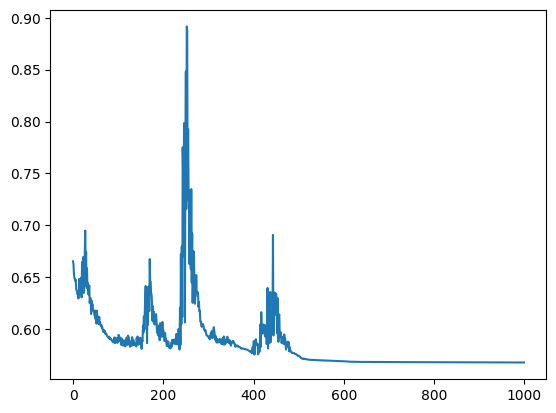

In [21]:
plt.plot(losses)
plt.show()

In [22]:
with torch.no_grad():
  model = model.to('cpu')
  y_pred = model(x_test)
  y_pred = y_pred.detach().numpy()
  predicted = np.argmax(y_pred, axis =1)
  accuracy = (accuracy_score(predicted, y_test))

In [23]:
print(f'model의 output은 :  {y_pred[0]}')
print(f'argmax를 한 후의 output은 {predicted[0]}')
print(f'accuracy는 {accuracy}')

model의 output은 :  [9.9987328e-01 1.3960319e-05 1.1275225e-04]
argmax를 한 후의 output은 0
accuracy는 0.9814814814814815


| Hidden layer1 | Hidden layer 2 | Accuracy |
|----------|----------|----------|
| 64 | 32 | 0.388 |
| 128 | 9 | 0.333 |
| 500 | 27 | 0.981 |

생각보다 정확도가 좋지 않다. 뭐가 문제일까..

# < 3주차 과제 2 : CNN 맛보기>

In [ ]:
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable

In [ ]:
# Training settings

batch_size = 64

# MNIST Dataset
train_dataset = datasets.MNIST(root='./data/',
                               train=True,
                               transform=transforms.ToTensor(),
                               download=True)

test_dataset = datasets.MNIST(root='./data/',
                              train=False,
                              transform=transforms.ToTensor())

# Data Loader (Input Pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

In [ ]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.conv1 = nn.Conv2d(1, 10, kernel_size = 5)
    self.conv2 = nn.Conv2d(10, 20, kernel_size = 5)
    self.mp = nn.MaxPool2d(2)
    self.fc = nn.Linear(320, 10) ### : 알맞는 input은? 인수: 320?

  def forward(self, x):
    in_size = x.size(0)
    x = F.relu(self.mp(self.conv1(x)))
    x = F.relu(self.mp(self.conv2(x)))
    x = x.view(in_size, -1)
    x = self.fc(x)
    return F.log_softmax(x)

In [ ]:
model = Net()
optimizer = optim.SGD(model.parameters(), lr = 0.01, momentum = 0.5)

In [ ]:
def train(epoch):
  model.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    data, target = Variable(data), Variable(target)
    optimizer.zero_grad()
    output = model(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % 10 == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
          epoch, batch_idx * len(data), len(train_loader.dataset),
          100. * batch_idx / len(train_loader), loss.item()))

In [ ]:
def test():
    model.eval() #model.eval() 의 기능은?
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        data, target = Variable(data, volatile=True), Variable(target)
        output = model(data)
        test_loss += F.nll_loss(output, target, size_average=False).data # nll_loss?? / cross entropy loss와의 관계 확인!
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [ ]:
for epoch in range(1, 10):
    train(epoch)
    test()

<ipython-input-36-7bda15c12f57>:15: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.309633
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.251448
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.242977
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.207593
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.162951
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.102299
Train Epoch: 1 [3840/60000 (6%)]	Loss: 2.019460
Train Epoch: 1 [4480/60000 (7%)]	Loss: 1.811223
Train Epoch: 1 [5120/60000 (9%)]	Loss: 1.668923
Train Epoch: 1 [5760/60000 (10%)]	Loss: 1.465732
Train Epoch: 1 [6400/60000 (11%)]	Loss: 1.086230
Train Epoch: 1 [7040/60000 (12%)]	Loss: 0.819841
Train Epoch: 1 [7680/60000 (13%)]	Loss: 0.987055
Train Epoch: 1 [8320/60000 (14%)]	Loss: 0.616366
Train Epoch: 1 [8960/60000 (15%)]	Loss: 0.798320
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.818280
Train Epoch: 1 [10240/60000 (17%)]	Loss: 0.646864
Train Epoch: 1 [10880/60000 (18%)]	Loss: 0.558093
Train Epoch: 1 [11520/60000 (19%)]	Loss: 0.718366
Train Epoch: 1 [12160/60000 (20%)]	Loss: 0.549295
Train Epoch: 1 [12800/60000 (

<ipython-input-39-f52337105c2a>:6: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data, target = Variable(data, volatile=True), Variable(target)
/usr/local/lib/python3.10/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Average loss: 0.1722, Accuracy: 9486/10000 (95%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.160414
Train Epoch: 2 [640/60000 (1%)]	Loss: 0.313018
Train Epoch: 2 [1280/60000 (2%)]	Loss: 0.114778
Train Epoch: 2 [1920/60000 (3%)]	Loss: 0.074981
Train Epoch: 2 [2560/60000 (4%)]	Loss: 0.280264
Train Epoch: 2 [3200/60000 (5%)]	Loss: 0.162230
Train Epoch: 2 [3840/60000 (6%)]	Loss: 0.341868
Train Epoch: 2 [4480/60000 (7%)]	Loss: 0.171879
Train Epoch: 2 [5120/60000 (9%)]	Loss: 0.099763
Train Epoch: 2 [5760/60000 (10%)]	Loss: 0.195877
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.112799
Train Epoch: 2 [7040/60000 (12%)]	Loss: 0.070197
Train Epoch: 2 [7680/60000 (13%)]	Loss: 0.107087
Train Epoch: 2 [8320/60000 (14%)]	Loss: 0.230121
Train Epoch: 2 [8960/60000 (15%)]	Loss: 0.097375
Train Epoch: 2 [9600/60000 (16%)]	Loss: 0.196230
Train Epoch: 2 [10240/60000 (17%)]	Loss: 0.075814
Train Epoch: 2 [10880/60000 (18%)]	Loss: 0.211486
Train Epoch: 2 [11520/60000 (19%)]	Loss: 0.149819
Train Epoch: 2 [12